## Homework 1 
### DUE: Thursday Jan 30

**The semi-empirical mass formula**

In nuclear physics, the semi-empirical mass formula is a formula for calculating the
approximate nuclear binding energy $B$ of an atomic nucleus with atomic number $Z$
and mass number $A$. The formula looks like this:
    
$$ B = a_1 A - a_2 A^{2/3} - a_3 \frac{Z^2}{A^{1/3}} - a_4 \frac{(A - 2Z)^2}{A} - \frac{a_5}{A^{1/2}} $$

where, in units of millions of electron volts (MeV), the constants are $a_1 =
15.67$, $a_2 = 17.23$, $a_3 = 0.75$, $a_4 = 93.2$, and

$$ a_5  \; =  \;\; \left\{ \begin{array} {r@{\quad\tt if \quad}l} 0 & A \;{\tt is
      \; odd}, \\
    12.0 & A \;{\tt and}\; Z \;{\tt are \;both \;even}, \\ -12.0 & A \;{\tt is
     \;  even \; and}\;  Z \;{\tt is
  \;  odd.} \end{array} \right. $$

Write a **function** that takes as its input the values of $A$ and $Z$, and
prints out the binding energy $B$ for the corresponding atom 

Use your program to find
the binding energy of an atom with $A = 58$ and $Z = 28$. (Hint: The
correct answer is around 490 MeV.) 

(20 points)

In [1]:
import matplotlib.pyplot as plt
import numpy as np


#this function finds the binding energy of an atom
def bindingEnergy(A,Z):
   
    #these are definitions of constants 
    a1 = 15.67
    a2 = 17.23
    a3 = 0.75
    a4 = 93.2 
    
    #checking if A or Z is even or odd
    if (A % 2 == 0) & (Z % 2 == 0):
        a5 = 12.0
    elif (A % 2 == 0):
        a5 = -12.0
    else:
        a5 = 0
    
    #this is the formula for B
    B = (a1 * A) - (a2 * A**(2/3) ) - (a3 * (Z**2 / A**(1/3) ) ) - (a4 * ( (A -2*Z)**2 /A ) ) - (a5 / A**(1/2) )
                                                                     
    return B

print(bindingEnergy(58, 28))

    
    

490.78425241273493


Now create a new function that calculates the binding energy per nucleon, B/A. You should be able to write a very short function that calls your previous function to do the heavy lifting. Test your function with some famous cases, e.g., iron 56 and carbon 12.

(10 points)

In [2]:

def bindingEnergyPerNucleon(A, Z):
    
    bindingEperN = bindingEnergy(A, Z)/A
    
    return bindingEperN
    
print(bindingEnergyPerNucleon(56, 26))
print(bindingEnergyPerNucleon(12, 6))


8.295881590830033
6.872651138873636


Create yet another function that takes a single argument, Z, and finds the value of A at which the binding energy per nucleon is largest. You are aided in this problem in the fact that A is discrete; you can simply check all reasonable values without worrying about mimizing a function or any such thing. You should be able to easily determine the minimum value for A. If you consult a table of nuclides, you'll see some elements have nuclides, with measured half lives, with A > 2Z, so in this exercise use A = 3Z as an upper limit. I encourage you to go verify this! At the time of writing wikipedia has a high resolution version https://upload.wikimedia.org/wikipedia/commons/9/92/NuclideMap.PNG

(20 points)

In [3]:

#this function takes the Z value and uses it to find the highest energy per nucleon by going through each A value
def highestBindingEnergyPerNucleon(Z):
    
    maxBindingEnergy = 0
    bestA = 0
    
    for A in range(Z, (3*Z)+1 ):
        
        bindingEnergy = bindingEnergyPerNucleon(A, Z)
        
        if bindingEnergy > maxBindingEnergy:
            maxBindingEnergy = bindingEnergy
            bestA = A
            
    return maxBindingEnergy
        
print(highestBindingEnergyPerNucleon(26))   
    


8.50316830638522


Finally, create a plot of the highest binding energy per nucleon as a function of Z. Remember: science quality plots have labeled axes and a title.

(10 points)

Text(0, 0.5, 'Binding Energy Per Nucleon (MeV)')

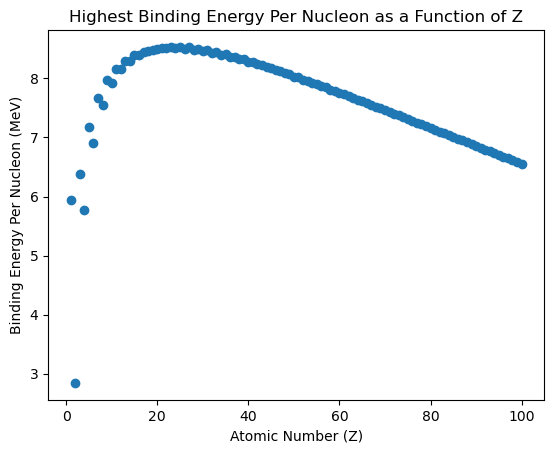

In [4]:

#this creates a plot of Z vals up to 100 and their assocated highest binding energies
ZVals = range(1, 101)
maxBindingEnergies = [highestBindingEnergyPerNucleon(Z) for Z in ZVals]
plt.scatter(ZVals, maxBindingEnergies) 
plt.title("Highest Binding Energy Per Nucleon as a Function of Z")
plt.xlabel("Atomic Number (Z)")
plt.ylabel("Binding Energy Per Nucleon (MeV)")



**Least Squares fitting**

It's a common situation in physics that an experiment produces data
that lies roughly on a straight line. The straight line can be represented in the familiar form $y=mx+c$ and a
frequent question is what the appropriate values of the slope $m$ and
intercept $c$ are that correspond to the measured data.  Since the data
don't fall perfectly on a straight line, there is no perfect answer to such
a question, but we can find the straight line that gives the best
compromise fit to the data.  The standard technique for doing this is the
*method of least squares*.

Suppose we make some guess about the parameters $m$ and $c$ for the
straight line.  We then calculate the vertical distances between the data
points and that line, as represented by the short vertical lines in the
figure, then we calculate the sum of the squares of those distances, which
we denote $\chi^2$.  If we have $N$ data points with
coordinates $(x_i,y_i)$, then $\chi^2$ is given by

$$\chi^2 = \sum_{i=1}^N (mx_i+c-y_i)^2.$$

The least-squares fit of the straight line to the data is the straight line
that minimizes this total squared distance from data to line.  We find the
minimum by differentiating with respect to both $m$ and $c$ and setting the
derivatives to zero, which gives

$$m \sum_{i=1}^N x_i^2 + c \sum_{i=1}^N x_i - \sum_{i=1}^N x_iy_i = 0, $$
$$m \sum_{i=1}^N x_i + cN - \sum_{i=1}^N y_i = 0.$$

For convenience, let us define the following quantities:

$$E_x = {1\over N} \sum_{i=1}^N x_i,\qquad
E_y = {1\over N} \sum_{i=1}^N y_i,\qquad
E_{xx} = {1\over N} \sum_{i=1}^N x_i^2,\qquad
E_{xy} = {1\over N} \sum_{i=1}^N x_iy_i $$

in terms of which our equations can be written

$$mE_{xx} + cE_x = E_{xy}, $$
$$mE_x + c = E_y.$$

Solving these equations simultaneously for $m$ and $c$ now gives

$$m = {E_{xy}-E_x E_y\over E_{xx} - E_x^2},\qquad
c = {E_{xx}E_y-E_x E_{xy}\over E_{xx} - E_x^2}.$$

These are the equations for the least-squares fit of a straight line to $N$
data points.  They tell you the values of $m$ and $c$ for the line that
best fits the given data.

In this repo is a file called `millikan.txt`.  The file contains two columns of numbers, giving
the $x$ and $y$ coordinates of a set of data points.  Write a program to
read these data points and make a graph with one dot or circle for each
point.

(15 points)

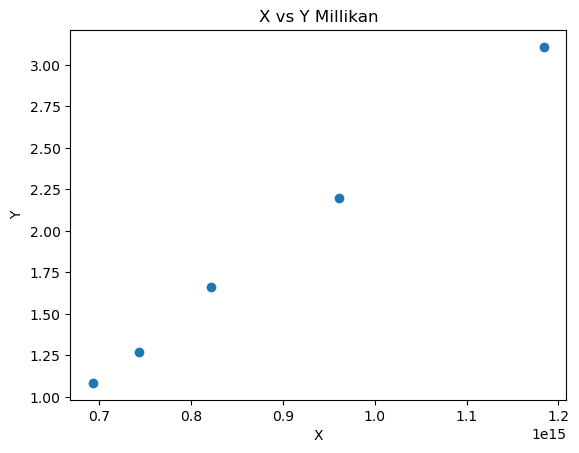

In [5]:

dataFromMillikan = np.genfromtxt("millikan.txt", dtype=None, encoding="UTF-8", names=True)

XValsMillikan = [float(x[0]) for x in dataFromMillikan]
YValsMillikan = [float(x[1]) for x in dataFromMillikan]
plt.scatter(XValsMillikan, YValsMillikan)
plt.title("X vs Y Millikan")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


Calculate the quantities $E_x$, $E_y$, $E_{xx}$, and $E_{xy}$ defined above, and from them calculate and print out the slope $m$ and intercept $c$ of the best-fit line. Plot the line with the data.

(20 points)

4.1522802299515304e-17
1.8284103490247205


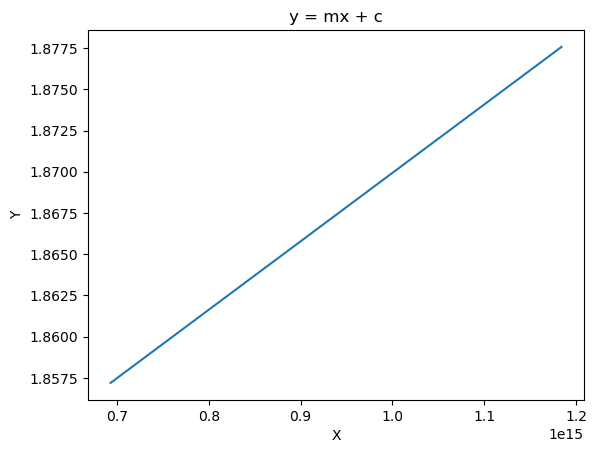

In [6]:
#this gets the number of values in our data set 
N = len(XValsMillikan)

def Ex(x):
    return (sum(x) / N)

def Ey(y):
    return (sum(y) / N)

def Exx(x):
    return (sum(x)**2 / N)

def Exy(x, y):
    newX = np.array(x) #turned into array so they would multiply correctly 
    newY = np.array(y)
    return sum(newX * newY) / N

#calculating each value for millikan data
ExMillikan = Ex(XValsMillikan)
EyMillikan = Ey(YValsMillikan)
ExxMillikan = Exx(XValsMillikan)
ExyMillikan = Exy(XValsMillikan, YValsMillikan)

#slope
m = ( ExyMillikan - (ExMillikan * EyMillikan) ) / (ExxMillikan - ExMillikan**2)

#intercept
c = ( (ExxMillikan * EyMillikan) - (ExMillikan * ExyMillikan) ) / (ExxMillikan - ExMillikan**2)


print(m)
print(c)



# Plot the line
y = m * np.array(XValsMillikan) + c
plt.plot(XValsMillikan, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('y = mx + c')
plt.show()

The data in the file `millikan.txt` are taken from a historic
  experiment by Robert Millikan that measured the
  *photoelectric effect*.  When light of an appropriate wavelength is
  shone on the surface of a metal, the photons in the light can strike
  conduction electrons in the metal and, sometimes, eject them from the
  surface into the free space above.  The energy of an ejected electron is
  equal to the energy of the photon that struck it minus a small
  amount~$\phi$ called the **work function** of the surface,
  which represents the energy needed to remove an electron from the
  surface.  The energy of a photon is $h\nu$, where $h$ is Planck's
  constant and $\nu$ is the frequency of the light, and we can measure the
  energy of an ejected electron by measuring the voltage $V$ that is just
  sufficient to stop the electron moving.  Then the voltage, frequency, and
  work function are related by the equation

$$V = {h\over e}\nu - \phi,$$

where $e$ is the charge on the electron.  This equation was first given by
Albert Einstein in 1905.

The data in the file `millikan.txt` represent frequencies $\nu$ in
hertz (first column) and voltages $V$ in volts (second column) from
photoelectric measurements of this kind.  Using the equation above and the
program you wrote, and given that the charge on the electron is
$1.602\times10^{-19}\,$C, calculate from Millikan's experimental data a
value for Planck's constant.  Compare your value with the accepted value of
the constant, which you can find in books or on-line.  You should get a
result within a couple of percent of the accepted value.

(5 points)

This calculation is essentially the same as the one that Millikan himself
used to determine of the value of Planck's constant, although, lacking a
computer, he fitted his straight line to the data by eye.  In part for this
work, Millikan was awarded the Nobel prize in physics in 1923.

In [7]:
#charge of electron
e = 1.602e-19

#calculate plancks constant
plancksConstant = m * e

print(plancksConstant)

6.651952928382352e-36


Plancks Constant is equal to 6.651952928382352e-36

